In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
evict = pd.read_csv('../data/cleaned_for_testing.csv')
evict.columns

Index(['GEOID', 'year', 'name', 'parent-location', 'population',
       'poverty-rate', 'renter-occupied-households', 'pct-renter-occupied',
       'median-gross-rent', 'median-household-income', 'median-property-value',
       'rent-burden', 'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind',
       'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other',
       'eviction-filings', 'evictions', 'eviction-rate',
       'eviction-filing-rate', 'low-flag', 'imputed', 'subbed', 'OBJECTID',
       'PUD_NAME', 'PUD_WEB_URL', 'PUD_CHANGE_NARRATIVE', 'PUD_ZONING',
       'PUD_STATUS', 'PUD_CASE_NUMBER', 'SHAPEAREA', 'SHAPELEN', 'GLOBALID',
       'WARD'],
      dtype='object')

In [19]:
sns.set_context('talk')

In [ ]:
viz0 = pd.DataFrame(evict.groupby(['GEOID'])['OBJECTID'].agg('count'))
viz0.reset_index(inplace=True)
viz0

In [82]:
viz1 = evict[['GEOID', 'eviction-rate']].drop_duplicates()

In [117]:
bins = [0,1,2,3,4,5,6]

In [232]:
viz2 = viz0.merge(viz1, on='GEOID')
viz2['eviction_cat0'] = evict['eviction-rate'] > 2.59

viz2['eviction_cat1'] = pd.qcut(evict['eviction-rate'], q=7, labels=bins)
viz2['GEOID'] = viz2['GEOID'].astype('str')
viz2.sort_values(by='OBJECTID', inplace=True)
viz2

,GEOID,OBJECTID,eviction-rate,eviction_cat0,eviction_cat1
0,11001007301,0,0.49,False,0
20,11001009811,0,9.86,True,6
19,11001009810,0,6.46,True,0
17,11001009804,0,9.43,True,0
9,11001007502,0,5.10,True,4
7,11001007408,0,6.66,True,2
11,11001007504,0,4.92,True,2
3,11001007403,0,7.44,False,0
5,11001007406,1,7.19,True,5
8,11001007409,1,9.81,True,2


In [189]:
sortorder = list(viz2['GEOID'])
sortorder

['11001007301',
 '11001007304',
 '11001007401',
 '11001007403',
 '11001007404',
 '11001007406',
 '11001007407',
 '11001007408',
 '11001007409',
 '11001007502',
 '11001007503',
 '11001007504',
 '11001007601',
 '11001009700',
 '11001009801',
 '11001009802',
 '11001009803',
 '11001009804',
 '11001009807',
 '11001009810',
 '11001009811',
 '11001010400',
 '11001010900']

In [ ]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

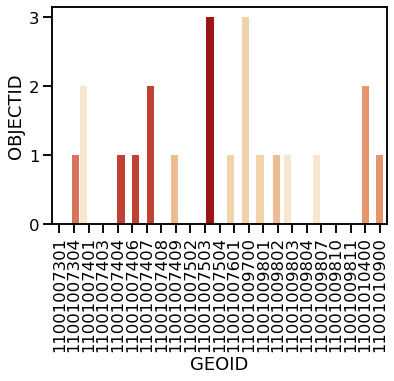

In [151]:
ax = sns.barplot(x='GEOID', y='OBJECTID', hue='eviction_cat1', palette='OrRd', data=viz2);
ax.get_legend().remove()

change_width(ax, .5)

plt.xticks(rotation=90);

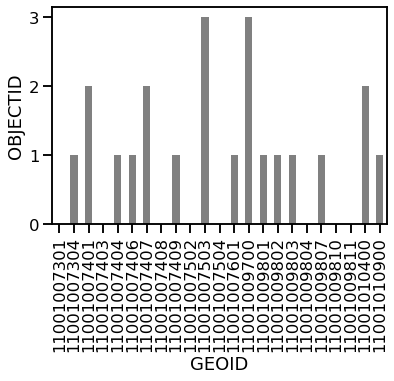

['11001007301',
 '11001009811',
 '11001009810',
 '11001009804',
 '11001007502',
 '11001007408',
 '11001007504',
 '11001007403',
 '11001007406',
 '11001007409',
 '11001007404',
 '11001007601',
 '11001009801',
 '11001009802',
 '11001009803',
 '11001009807',
 '11001007304',
 '11001010900',
 '11001010400',
 '11001007401',
 '11001007407',
 '11001007503',
 '11001009700']

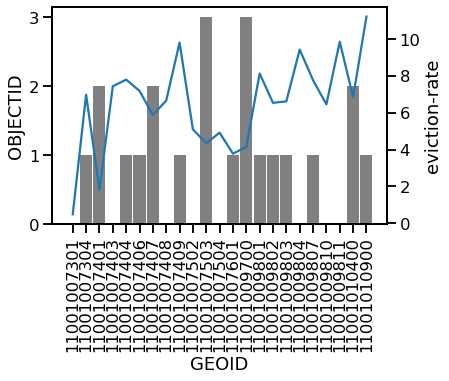

In [192]:
ax = sns.barplot(x='GEOID', y='OBJECTID', color='gray', data=viz2, order=)
change_width(ax, .9);

plt.xticks(rotation=90);
ax2 = ax.twinx()
ax2 = sns.lineplot(x='GEOID', y='eviction-rate',data=viz2);

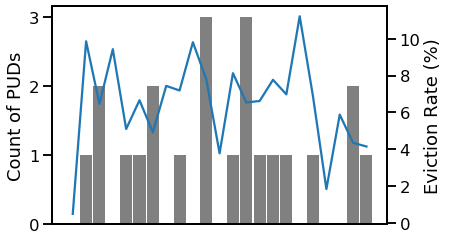

In [229]:
ax = sns.barplot(x='GEOID', y='OBJECTID', color='gray', data=viz2)
change_width(ax, .9);

ax.set_ylabel('Count of PUDs');
plt.xticks(rotation=90);

# Something is weird:
ax2 = ax.twinx()
ax2 = sns.lineplot(x='GEOID', y='eviction-rate',data=viz2, sort=False)
ax2.set_ylabel('Eviction Rate (%)');
ax.get_xaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
ax2.set_xlabel('Census Tract');




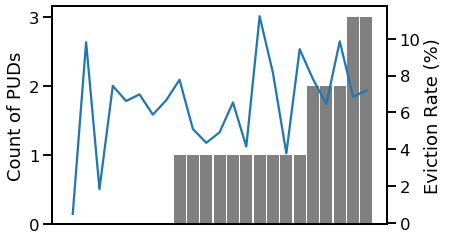

In [231]:
# DNU
ax = sns.barplot(x='GEOID', y='OBJECTID', color='gray', data=viz2, order=list(viz2.sort_values(by='OBJECTID')['GEOID']))

change_width(ax, .9);

ax.set_ylabel('Count of PUDs');
plt.xticks(rotation=90);

# Something is weird:
ax2 = ax.twinx()
ax2 = sns.lineplot(x=(list(viz2.sort_values(by='OBJECTID')['GEOID'])), y='eviction-rate',data=viz2)
ax2.set_ylabel('Eviction Rate (%)');
ax.get_xaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)


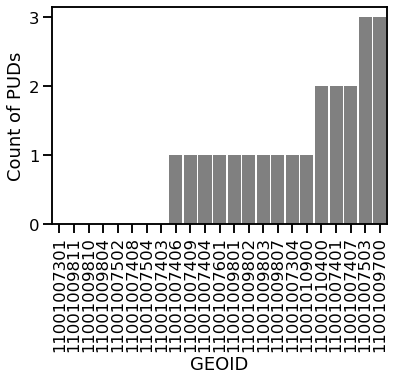

In [201]:
ax = sns.barplot(x='GEOID', y='OBJECTID', color='gray', data=viz2, order=list(viz2.sort_values(by='OBJECTID')['GEOID']))
change_width(ax, .9);

ax.set_ylabel('Count of PUDs');
plt.xticks(rotation=90);


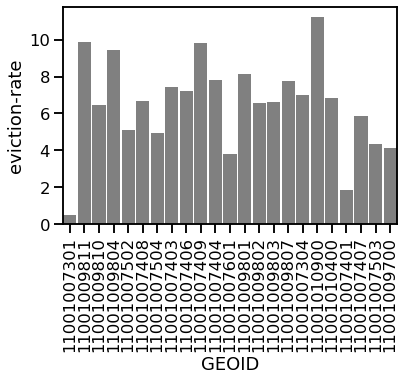

In [218]:
ax = sns.barplot(x='GEOID', y='eviction-rate', color='gray', data=viz2, order=list(viz2.sort_values(by='OBJECTID')['GEOID']))
change_width(ax, .9);

plt.xticks(rotation=90);


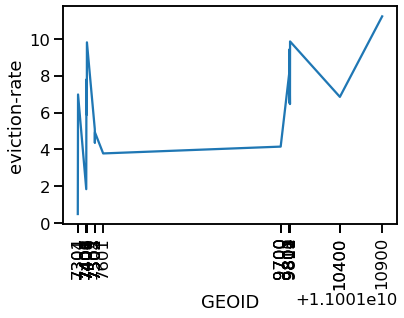

In [131]:
ax = sns.lineplot(x='GEOID', y='eviction-rate',data=viz2)
plt.xticks(rotation=90);

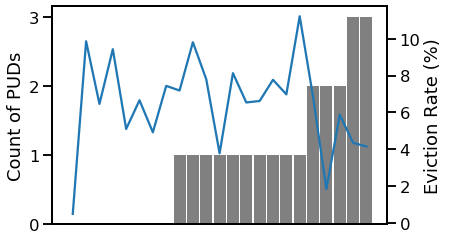

In [230]:
ax = sns.barplot(x='GEOID', y='OBJECTID', color='gray', data=viz2, order=list(viz2.sort_values(by='OBJECTID')['GEOID']))
change_width(ax, .9);

ax.set_ylabel('Count of PUDs');
plt.xticks(rotation=90);

ax2 = ax.twinx()
ax2 = sns.lineplot(x='GEOID', y='eviction-rate',data=viz2, sort=False)
ax2.set_ylabel('Eviction Rate (%)');
ax.get_xaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)



,eviction-rate,eviction_cat0
OBJECTID,,
0,6.295000,0.750000
1,7.584000,1.000000
2,4.856667,0.666667
3,4.250000,1.000000


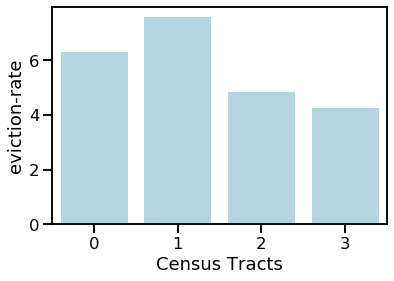

In [247]:
viz3 = viz2.groupby('OBJECTID').agg('mean').reset_index()
ax = sns.barplot(x='OBJECTID', y='eviction-rate', color='lightblue', data=viz3)
ax.set_xlabel('Census Tracts');


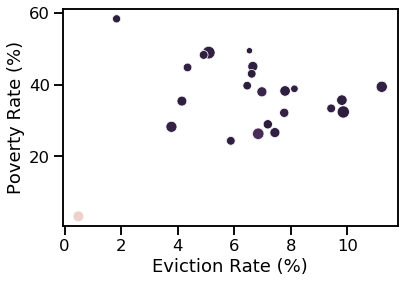

In [25]:
ax = sns.scatterplot(x=evict['eviction-rate'], y=evict['poverty-rate'], hue=(100 - evict['pct-white']), size=evict['population']);
ax.get_legend().remove()
ax.set_xlabel('Eviction Rate (%)');
ax.set_ylabel('Poverty Rate (%)');


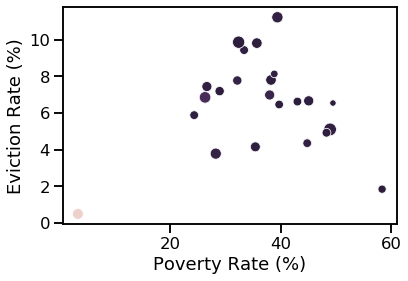

In [249]:
ax = sns.scatterplot(y=evict['eviction-rate'], x=evict['poverty-rate'], hue=(100 - evict['pct-white']), size=evict['population']);
ax.get_legend().remove()
ax.set_ylabel('Eviction Rate (%)');
ax.set_xlabel('Poverty Rate (%)');


In [248]:
evict['pct-white']

0     61.02
1      3.47
2      0.20
3      0.20
4      1.23
5      0.71
6      0.00
7      0.84
8      0.84
9      0.85
10     0.66
11     1.04
12     1.45
13     1.45
14     1.45
15     0.50
16     2.25
17     0.27
18     0.27
19     0.27
20     1.02
21     0.18
22     0.22
23     1.22
24     1.91
25     0.00
26     0.00
27     7.04
28     7.04
29     1.45
Name: pct-white, dtype: float64